<a href="https://colab.research.google.com/github/mukulsn/Projects/blob/main/RecSys/Notebooks/RecSys_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Second notebook of H&M course

downloading files from s3

In [ ]:
!pip install boto3==1.26.138


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.3.0
    Uninstalling urllib3-2.3.0:
      Successfully uninstalled urllib3-2.3.0


In [ ]:
import os
os.environ['AWS_ACCESS_KEY_ID'] = ''
os.environ['AWS_SECRET_ACCESS_KEY'] = ''

In [ ]:
import boto3
from botocore.exceptions import ClientError

# Replace with your AWS credentials
AWS_ACCESS_KEY_ID = os.environ['AWS_ACCESS_KEY_ID']
AWS_SECRET_ACCESS_KEY = os.environ['AWS_SECRET_ACCESS_KEY']
BUCKET_NAME = "recsys-system"

# Create an S3 client
s3 = boto3.client(
    's3',
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY
)

def upload_file(file_name, bucket, object_name=None):
    """Upload a file to an S3 bucket

    Args:
        file_name (str): File to upload
        bucket (str): Bucket to upload to
        object_name (str): S3 object name. If not specified then file_name is used
    """
    if object_name is None:
        object_name = file_name

    try:
        response = s3.upload_file(file_name, bucket, object_name)
        print(f"Uploaded {file_name} to {bucket}/{object_name}")
    except ClientError as e:
        print(f"Error uploading {file_name} to {bucket}/{object_name}: {e}")

def download_file(bucket, object_name, file_name):
    """Download a file from an S3 bucket

    Args:
        bucket (str): Bucket to download from
        object_name (str): S3 object name
        file_name (str): File to download to
    """
    try:
        s3.download_file(bucket, object_name, file_name)
        print(f"Downloaded {object_name} from {bucket} to {file_name}")
    except ClientError as e:
        print(f"Error downloading {object_name} from {bucket}: {e}")

def delete_object(bucket, object_name):
    """Delete an object from an S3 bucket

    Args:
        bucket (str): Bucket to delete from
        object_name (str): S3 object name
    """
    try:
        response = s3.delete_object(Bucket=bucket, Key=object_name)
        print(f"Deleted {object_name} from {bucket}")
    except ClientError as e:
        print(f"Error deleting {object_name} from {bucket}: {e}")

def upload_dir_to_s3(local_dir, bucket_name, s3_prefix):
    """
    Uploads the contents of a local directory to an S3 bucket with a specified prefix.

    Args:
        local_dir: Path to the local directory to upload.
        bucket_name: Name of the S3 bucket.
        s3_prefix: Prefix for the objects in the S3 bucket.
    """
    s3_client = boto3.client('s3')

    for root, dirs, files in os.walk(local_dir):
        for file_name in files:
            local_file_path = os.path.join(root, file_name)
            relative_path = os.path.relpath(local_file_path, local_dir)
            s3_key = os.path.join(s3_prefix, relative_path)

            try:
                s3_client.upload_file(local_file_path, bucket_name, s3_key)
                print(f"Uploaded {local_file_path} to s3://{bucket_name}/{s3_key}")
            except Exception as e:
                print(f"Error uploading {local_file_path}: {e}")

# Example usage
# upload_file('local_file.txt', BUCKET_NAME)
# download_file(BUCKET_NAME, 'remote_file.txt', 'local_file.txt')
# delete_object(BUCKET_NAME, 'remote_file.txt')

In [ ]:
download_file(BUCKET_NAME, 'features/articles.parquet', 'articles.parquet')

Downloaded features/articles.parquet from recsys-system to articles.parquet


In [ ]:
download_file(BUCKET_NAME, 'features/customers.parquet', 'customers.parquet')
download_file(BUCKET_NAME, 'features/transactions.parquet', 'transactions.parquet')
download_file(BUCKET_NAME, 'features/ranking.parquet', 'ranking.parquet')
download_file(BUCKET_NAME, 'features/interaction.parquet', 'interaction.parquet')

Downloaded features/customers.parquet from recsys-system to customers.parquet
Downloaded features/transactions.parquet from recsys-system to transactions.parquet
Downloaded features/ranking.parquet from recsys-system to ranking.parquet
Downloaded features/interaction.parquet from recsys-system to interaction.parquet


# Actual Code

In [ ]:
import time

notebook_start_time = time.time()

In [ ]:
import sys
from pathlib import Path


def is_google_colab() -> bool:
    if "google.colab" in str(get_ipython()):
        return True
    return False


def clone_repository() -> None:
    !git clone https://github.com/decodingml/hands-on-recommender-system.git
    %cd hands-on-recommender-system/


def install_dependencies() -> None:
    !pip install --upgrade uv
    !uv pip install --all-extras --system --requirement pyproject.toml


if is_google_colab():
    clone_repository()
    install_dependencies()

    root_dir = str(Path().absolute())
    print("⛳️ Google Colab environment")
else:
    root_dir = str(Path().absolute().parent)
    print("⛳️ Local environment")

# Add the root directory to the `PYTHONPATH` to use the `recsys` Python module from the notebook.
if root_dir not in sys.path:
    print(f"Adding the following directory to the PYTHONPATH: {root_dir}")
    sys.path.append(root_dir)

Cloning into 'hands-on-recommender-system'...
remote: Enumerating objects: 927, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 927 (delta 41), reused 50 (delta 27), pack-reused 837 (from 1)
Receiving objects: 100% (927/927), 4.38 MiB | 11.51 MiB/s, done.
Resolving deltas: 100% (565/565), done.
/content/hands-on-recommender-system
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 82.5 MB/s eta 0:00:00
Using Python 3.11.11 environment at: /usr
Resolved 198 packages in 3.66s
Building sentence-transformers==2.2.2
Building sentence-transformers==2.2.2
Building avro==1.11.3
Building sentence-transformers==2.2.2
Building avro==1.11.3
Building twofish==0.3.0
Building sentence-transformers==2.2.2
Building avro==1.11.3
Building twofish==0.3.0
Building sentence-transformers==2.2.2
Building avro==1.11.3
Building twofish==0.3.0
⠙ Preparing packages... (0/49)
Building sentence-transformers==2.2.2
Building avro==1.11.3
Buildin

In [ ]:
%load_ext autoreload
%autoreload 2

import warnings

warnings.filterwarnings("ignore")

from loguru import logger

from recsys import hopsworks_integration, training
from recsys.config import settings

In [ ]:
from pprint import pprint

pprint(dict(settings))

{'CUSTOMER_DATA_SIZE': <CustomerDatasetSize.SMALL: 'SMALL'>,
 'CUSTOM_HOPSWORKS_INFERENCE_ENV': 'custom_env_name',
 'FEATURES_EMBEDDING_MODEL_ID': 'all-MiniLM-L6-v2',
 'HOPSWORKS_API_KEY': None,
 'OPENAI_API_KEY': None,
 'OPENAI_MODEL_ID': 'gpt-4o-mini',
 'RANKING_DATASET_VALIDATON_SPLIT_SIZE': 0.1,
 'RANKING_EARLY_STOPPING_ROUNDS': 5,
 'RANKING_ITERATIONS': 100,
 'RANKING_LEARNING_RATE': 0.2,
 'RANKING_MODEL_TYPE': 'ranking',
 'RANKING_SCALE_POS_WEIGHT': 10,
 'RECSYS_DIR': PosixPath('/content/hands-on-recommender-system/recsys'),
 'TWO_TOWER_DATASET_TEST_SPLIT_SIZE': 0.1,
 'TWO_TOWER_DATASET_VALIDATON_SPLIT_SIZE': 0.1,
 'TWO_TOWER_LEARNING_RATE': 0.01,
 'TWO_TOWER_MODEL_BATCH_SIZE': 2048,
 'TWO_TOWER_MODEL_EMBEDDING_SIZE': 16,
 'TWO_TOWER_NUM_EPOCHS': 10,
 'TWO_TOWER_WEIGHT_DECAY': 0.001}


In [ ]:
# def get_train_val_split(self):
#         logger.info("Retrieving and creating train, val test split...")

#         train_df, val_df, test_df, _, _, _ = (
#             self._feature_view.train_validation_test_split(
#                 validation_size=settings.TWO_TOWER_DATASET_VALIDATON_SPLIT_SIZE,
#                 test_size=settings.TWO_TOWER_DATASET_TEST_SPLIT_SIZE,
#                 description="Retrieval dataset splits",
#             )
#         )

#         train_ds = (
#             self.df_to_ds(train_df)
#             .batch(self._batch_size)
#             .cache()
#             .shuffle(self._batch_size * 10)
#         )
#         val_ds = self.df_to_ds(val_df).batch(self._batch_size).cache()

#         self._properties = {
#             "train_df": train_df,
#             "val_df": val_df,
#             "query_df": train_df[self.query_features],
#             "item_df": train_df[self.candidate_features],
#             "user_ids": train_df["customer_id"].unique().tolist(),
#             "item_ids": train_df["article_id"].unique().tolist(),
#             "garment_groups": train_df["garment_group_name"].unique().tolist(),
#             "index_groups": train_df["index_group_name"].unique().tolist(),
#         }

#         return train_ds, val_ds


decoding these lines

dataset = training.two_tower.TwoTowerDataset(
    feature_view=feature_view, batch_size=settings.TWO_TOWER_MODEL_BATCH_SIZE
)
train_ds, val_ds = dataset.get_train_val_split()

In [ ]:
# dataset = training.two_tower.TwoTowerDataset(
#     feature_view=feature_view, batch_size=settings.TWO_TOWER_MODEL_BATCH_SIZE
# )
# train_ds, val_ds = dataset.get_train_val_split()

NameError: name 'feature_view' is not defined

In [ ]:
# reading files
import polars as po
trans_fg = po.read_parquet("/content/transactions.parquet")
articles_fg = po.read_parquet("/content/articles.parquet")
customers_fg = po.read_parquet("/content/customers.parquet")

In [ ]:
trans_fg.shape

(31788324, 9)

In [ ]:
customers_fg = customers_fg.head(300000)
trans_fg = trans_fg.head(300000)


In [ ]:
import numpy as np
import polars as pl
def create_sin_cos_columns(df, month_col_name):
  """
  Creates two new columns in a Polars DataFrame:
    - 'month_sin': Sine of the month.
    - 'month_cos': Cosine of the month.

  Args:
    df: The input Polars DataFrame.
    month_col_name: The name of the column containing the month values (integers 1-12).

  Returns:
    The DataFrame with the new 'month_sin' and 'month_cos' columns.
  """

  C = 2 * np.pi / 12

  return df.with_columns([
      pl.col(month_col_name).map_elements(lambda x: np.sin(x * C)).alias("month_sin"),
      pl.col(month_col_name).map_elements(lambda x: np.cos(x * C)).alias("month_cos")
  ])

trans_fg = create_sin_cos_columns(trans_fg,'month')

In [ ]:
trans_fg.shape

(300000, 11)

In [ ]:
# first join the dataset
# system automatically crashing
# to solve that reduce the columns

selected_features = (
        trans_fg.select(
            ["customer_id", "article_id", "t_dat", "price","month_sin", "month_cos"]
        )
        .join(
            customers_fg.select(['customer_id',"age", "club_member_status", "age_group"]),
            on="customer_id",
        )
        .join(
            articles_fg.select(['article_id',"garment_group_name", "index_group_name"]),
            on="article_id",
        )
    )
selected_features.shape

(67485, 11)

In [ ]:

# class TwoTowerDataset:
#     def __init__(self, feature_view, batch_size: int) -> None:
#         self._feature_view = feature_view
#         self._batch_size = batch_size
#         self._properties: dict | None

#     @property
#     def query_features(self) -> list[str]:
#         return ["customer_id", "age", "month_sin", "month_cos"]

#     @property
#     def candidate_features(self) -> list[str]:
#         return [
#             "article_id",
#             "garment_group_name",
#             "index_group_name",
#         ]

#     @property
#     def properties(self) -> dict:
#         assert self._properties is not None, "Call get_train_val_split() first."

#         return self._properties

#     def get_items_subset(self):
#         item_df = self.properties["train_df"][self.candidate_features]
#         item_df.drop_duplicates(subset="article_id", inplace=True)
#         item_ds = self.df_to_ds(item_df)

#         return item_ds

#     def get_train_val_split(self):
#         logger.info("Retrieving and creating train, val test split...")

#         train_df, val_df, test_df, _, _, _ = (
#             self._feature_view.train_validation_test_split(
#                 validation_size=settings.TWO_TOWER_DATASET_VALIDATON_SPLIT_SIZE,
#                 test_size=settings.TWO_TOWER_DATASET_TEST_SPLIT_SIZE,
#                 description="Retrieval dataset splits",
#             )
#         )

#         train_ds = (
#             self.df_to_ds(train_df)
#             .batch(self._batch_size)
#             .cache()
#             .shuffle(self._batch_size * 10)
#         )
#         val_ds = self.df_to_ds(val_df).batch(self._batch_size).cache()

#         self._properties = {
#             "train_df": train_df,
#             "val_df": val_df,
#             "query_df": train_df[self.query_features],
#             "item_df": train_df[self.candidate_features],
#             "user_ids": train_df["customer_id"].unique().tolist(),
#             "item_ids": train_df["article_id"].unique().tolist(),
#             "garment_groups": train_df["garment_group_name"].unique().tolist(),
#             "index_groups": train_df["index_group_name"].unique().tolist(),
#         }

#         return train_ds, val_ds

#     def df_to_ds(self, df):
#         return tf.data.Dataset.from_tensor_slices({col: df[col] for col in df})


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

def split_train_val_test(df, train_size=0.7, val_size=0.2, test_size=0.1, random_state=42):
  """
  Splits a pandas DataFrame into train, validation, and test sets.

  Args:
    df: The pandas DataFrame to split.
    train_size: The proportion of the data to use for training (default: 0.7).
    val_size: The proportion of the data to use for validation (default: 0.2).
    test_size: The proportion of the data to use for testing (default: 0.1).
    random_state: The random seed for reproducibility (default: 42).

  Returns:
    A tuple containing the train, validation, and test DataFrames.
  """

  # # Check if proportions sum to 1
  # if not (train_size + val_size + test_size) == 1:
  #   raise ValueError("train_size, val_size, and test_size must sum to 1.")

  # Split into train and temp (combined validation and test)
  train_df, temp_df = train_test_split(df, train_size=train_size, random_state=random_state)

  # Calculate the proportion of validation set within the temp set
  val_size_in_temp = val_size / (val_size + test_size)

  # Split temp into validation and test
  val_df, test_df = train_test_split(temp_df, train_size=val_size_in_temp, random_state=random_state)

  return train_df, val_df, test_df

# # Example Usage
# data = {'col1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#         'col2': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']}
# df = pd.DataFrame(data)

# train_df, val_df, test_df = split_train_val_test(df)

# print("Train DataFrame:")
# print(train_df)
# print("\nValidation DataFrame:")
# print(val_df)
# print("\nTest DataFrame:")
# print(test_df)

In [ ]:
import tensorflow as tf
import tensorflow_recommenders as tfrs
from loguru import logger
from tensorflow.keras.layers import Normalization, StringLookup

from recsys.config import settings

def df_to_ds(df):
    return tf.data.Dataset.from_tensor_slices({col: df[col] for col in df})


In [ ]:



selected_features = selected_features.to_pandas()
train_df, val_df, test_df = split_train_val_test(selected_features)
# train_ds.shape,val_ds.shape,test_ds.shape
train_df = pl.from_pandas(train_df)
val_df = pl.from_pandas(val_df)
test_df = pl.from_pandas(test_df)

In [ ]:
pprint(dict(settings))

{'CUSTOMER_DATA_SIZE': <CustomerDatasetSize.SMALL: 'SMALL'>,
 'CUSTOM_HOPSWORKS_INFERENCE_ENV': 'custom_env_name',
 'FEATURES_EMBEDDING_MODEL_ID': 'all-MiniLM-L6-v2',
 'HOPSWORKS_API_KEY': None,
 'OPENAI_API_KEY': None,
 'OPENAI_MODEL_ID': 'gpt-4o-mini',
 'RANKING_DATASET_VALIDATON_SPLIT_SIZE': 0.1,
 'RANKING_EARLY_STOPPING_ROUNDS': 5,
 'RANKING_ITERATIONS': 100,
 'RANKING_LEARNING_RATE': 0.2,
 'RANKING_MODEL_TYPE': 'ranking',
 'RANKING_SCALE_POS_WEIGHT': 10,
 'RECSYS_DIR': PosixPath('/content/hands-on-recommender-system/recsys'),
 'TWO_TOWER_DATASET_TEST_SPLIT_SIZE': 0.1,
 'TWO_TOWER_DATASET_VALIDATON_SPLIT_SIZE': 0.1,
 'TWO_TOWER_LEARNING_RATE': 0.01,
 'TWO_TOWER_MODEL_BATCH_SIZE': 2048,
 'TWO_TOWER_MODEL_EMBEDDING_SIZE': 16,
 'TWO_TOWER_NUM_EPOCHS': 10,
 'TWO_TOWER_WEIGHT_DECAY': 0.001}


In [ ]:
train_df.columns

['customer_id',
 'article_id',
 't_dat',
 'price',
 'month_sin',
 'month_cos',
 'age',
 'club_member_status',
 'age_group',
 'garment_group_name',
 'index_group_name']

In [ ]:
{col: train_df[col] for col in train_df.columns}

{'customer_id': shape: (47_239,)
 Series: 'customer_id' [str]
 [
 	"0e1f0db797c2b5622a3aca3ba977b9…
 	"087b516b7b47bf8a4e9272d303af36…
 	"31a559e2115e5c1dec0ec6f0de80ae…
 	"09bca14258b7e9b9ee968adffe54d4…
 	"152a815e8b15c435a091acaab233a1…
 	…
 	"183f95587af05507ea9ed754b221f1…
 	"21cb8e2726d92aadeeb6f5feed103e…
 	"2627695924bb41383a8da306226be4…
 	"2e38ad408f0dd4b2b0bf3167328517…
 	"23155a65ba0df51293920835955a49…
 ],
 'article_id': shape: (47_239,)
 Series: 'article_id' [str]
 [
 	"662253002"
 	"639192002"
 	"672016005"
 	"620963004"
 	"626443003"
 	…
 	"625316007"
 	"456163028"
 	"665620001"
 	"189616007"
 	"552346001"
 ],
 't_dat': shape: (47_239,)
 Series: 't_dat' [i64]
 [
 	0
 	0
 	0
 	0
 	0
 	…
 	0
 	0
 	0
 	0
 	0
 ],
 'price': shape: (47_239,)
 Series: 'price' [f64]
 [
 	0.084729
 	0.06778
 	0.025407
 	0.003373
 	0.016932
 	…
 	0.016932
 	0.032475
 	0.035576
 	0.016932
 	0.033881
 ],
 'age': shape: (47_239,)
 Series: 'age' [f64]
 [
 	26.0
 	24.0
 	37.0
 	44.0
 	40.0
 	…
 	26.0


In [ ]:
train_ds = (
            tf.data.Dataset.from_tensor_slices({col: train_df[col] for col in train_df.columns})
            .batch(2048)
            .cache()
            .shuffle(2048 * 10)
        )
train_ds

<_ShuffleDataset element_spec={'customer_id': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'article_id': TensorSpec(shape=(None,), dtype=tf.string, name=None), 't_dat': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'price': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'month_sin': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'month_cos': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'club_member_status': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age_group': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'garment_group_name': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'index_group_name': TensorSpec(shape=(None,), dtype=tf.string, name=None)}>

In [ ]:
val_ds = tf.data.Dataset.from_tensor_slices({col: val_df[col] for col in val_df.columns}).batch(2048).cache()
val_ds

<CacheDataset element_spec={'customer_id': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'article_id': TensorSpec(shape=(None,), dtype=tf.string, name=None), 't_dat': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'price': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'month_sin': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'month_cos': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'club_member_status': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age_group': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'garment_group_name': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'index_group_name': TensorSpec(shape=(None,), dtype=tf.string, name=None)}>

In [ ]:
import numpy as np
print(np.shape(val_ds._tensors))

AttributeError: 'CacheDataset' object has no attribute '_tensors'

In [ ]:
_properties = {
            "train_df": train_df,
            "val_df": val_df,
            "query_df": train_df[["customer_id", "age", "month_sin", "month_cos"]],
            "item_df": train_df[[
            "article_id",
            "garment_group_name",
            "index_group_name",
        ]],
            "user_ids": train_df["customer_id"].unique().to_list(),
            "item_ids": train_df["article_id"].unique().to_list(),
            "garment_groups": train_df["garment_group_name"].unique().to_list(),
            "index_groups": train_df["index_group_name"].unique().to_list(),
        }
_properties['train_df'].shape,_properties['val_df'].shape

((47239, 11), (13497, 11))

In [ ]:
_properties['user_ids'].to_list()

['054b992ff8722ac97b51617f8748fdbc61826f232cb2f8c41bb7e9cd9ab077e8',
 '16a05e252c8a9c4ef1a9ebd6b9f494160519db6eb09beeb66f3dc8987b64e568',
 '1b4fa7b027b8873ecd6adbea462ff76848de3538d8d2685ef2a77d69700e6af4',
 '0a797a153e5105e6d070cb65de34e38039fb72884467da3f3f5b3cedc5f220ca',
 '25f84b30146077e569fbffa1e65f088c91d2d05fd5cbb2f35ef3a01d9b0269d9',
 '209587b290cfc2e21c017bf52462ee4f42b3c61428af649fb6a8526ccd4e060c',
 '25f89e55d984c35c479bae349bbcd2f98c52369135c47f8e2f5dbb6311ce4627',
 '18cf71b7244b051bfe6ecda266e2a0e907f23cba8bf24d2e77f809d8e5c9fcd5',
 '2deb638b3d2f1462a34d31de274c98ffb433c398e16dec4285ceaa0eb9fb3d9c',
 '135c17ec5a675a656fd5f21542201b70f4d933c286b04d60917950306451ad90',
 '0c76abcf95ee358d8855428f2a24a2bc4fdd1723ac72e5f52ae45a81bcfe4442',
 '3494eb620dddf8f3cc73b9dce39a77af77bfea0a4aa2710d05c8892dd401f4d4',
 '165dfffa1b787a7e92c3dcc5381f3093b83682aaf705f8ec3197705fcbf456c5',
 '02722fa427178b9ca33fdaf1050d1c15472432abd33e0048207701534feb5b20',
 '248bd3defdaac9c2e98f8216b017792a

In [ ]:
logger.info(f"Training samples: {len(_properties['train_df']):,}")
logger.info(f"Validation samples: {len(_properties['val_df']):,}")

logger.info(f"Number of users: {len(_properties['user_ids']):,}")
logger.info(f"Number of items: {len(_properties['item_ids']):,}")

2025-01-25 10:12:55.031 | INFO     | __main__:<cell line: 0>:1 - Training samples: 47,239
2025-01-25 10:12:55.034 | INFO     | __main__:<cell line: 0>:2 - Validation samples: 13,497
2025-01-25 10:12:55.037 | INFO     | __main__:<cell line: 0>:4 - Number of users: 14,976
2025-01-25 10:12:55.039 | INFO     | __main__:<cell line: 0>:5 - Number of items: 11,868


working for model

In [ ]:
# get_items_subset
item_df = _properties["train_df"][["article_id","garment_group_name","index_group_name"]]
item_df = item_df.unique(subset="article_id")
item_ds = tf.data.Dataset.from_tensor_slices({col: item_df[col] for col in item_df.columns}) #df_to_ds(item_df)
item_ds

<_TensorSliceDataset element_spec={'article_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'garment_group_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'index_group_name': TensorSpec(shape=(), dtype=tf.string, name=None)}>

In [ ]:
class QueryTowerFactory:
    def __init__(self) -> None:
        # self._dataset = _properties['user_ids']
        pass

    def build(self, embed_dim: int = settings.TWO_TOWER_MODEL_EMBEDDING_SIZE) -> "QueryTower":
        return QueryTower(user_ids=_properties['user_ids'],emb_dim=embed_dim)


class QueryTower(tf.keras.Model):
    def __init__(self, user_ids: list, emb_dim: int) -> None:
        super().__init__()

        self.user_embedding = tf.keras.Sequential(
            [
                StringLookup(vocabulary=user_ids, mask_token=None),
                tf.keras.layers.Embedding(
                    # Add an additional embedding to account for unknown tokens.
                    len(user_ids) + 1,
                    emb_dim,
                ),
            ]
        )

        self.normalized_age = Normalization(axis=None)

        self.fnn = tf.keras.Sequential(
            [
                tf.keras.layers.Dense(emb_dim, activation="relu"),
                tf.keras.layers.Dense(emb_dim),
            ]
        )

    def call(self, inputs):
        concatenated_inputs = tf.concat(
            [
                self.user_embedding(inputs["customer_id"]),
                tf.reshape(self.normalized_age(inputs["age"]), (-1, 1)),
                tf.reshape(inputs["month_sin"], (-1, 1)),
                tf.reshape(inputs["month_cos"], (-1, 1)),
            ],
            axis=1,
        )

        outputs = self.fnn(concatenated_inputs)

        return outputs


In [ ]:
query_model_factory = QueryTowerFactory()

In [ ]:
query_model = query_model_factory.build()

In [ ]:
class ItemTowerFactory:
    def __init__(self) -> None:
        # self._dataset = dataset
        pass

    def build(
        self, embed_dim: int = settings.TWO_TOWER_MODEL_EMBEDDING_SIZE
    ) -> "ItemTower":
        return ItemTower(
            item_ids=_properties["item_ids"],
            garment_groups=_properties["garment_groups"],
            index_groups=_properties["index_groups"],
            emb_dim=embed_dim,
        )


class ItemTower(tf.keras.Model):
    def __init__(
        self,
        item_ids: list,
        garment_groups: list,
        index_groups: list,
        emb_dim: int,
    ):
        super().__init__()

        self.garment_groups = garment_groups
        self.index_groups = index_groups

        self.item_embedding = tf.keras.Sequential(
            [
                StringLookup(vocabulary=item_ids, mask_token=None),
                tf.keras.layers.Embedding(
                    # Add an additional embedding to account for unknown tokens.
                    len(item_ids) + 1,
                    emb_dim,
                ),
            ]
        )
        # Converts strings into integer indices (scikit-learn LabelEncoder analog)
        self.garment_group_tokenizer = StringLookup(
            vocabulary=garment_groups,
            mask_token=None,
        )
        self.index_group_tokenizer = StringLookup(
            vocabulary=index_groups,
            mask_token=None,
        )

        self.fnn = tf.keras.Sequential(
            [
                tf.keras.layers.Dense(emb_dim, activation="relu"),
                tf.keras.layers.Dense(emb_dim),
            ]
        )

    def call(self, inputs):
        garment_group_embedding = tf.one_hot(
            self.garment_group_tokenizer(inputs["garment_group_name"]),
            len(self.garment_groups),
        )

        index_group_embedding = tf.one_hot(
            self.index_group_tokenizer(inputs["index_group_name"]),
            len(self.index_groups),
        )

        concatenated_inputs = tf.concat(
            [
                self.item_embedding(inputs["article_id"]),
                garment_group_embedding,
                index_group_embedding,
            ],
            axis=1,
        )

        outputs = self.fnn(concatenated_inputs)

        return outputs

In [ ]:
item_model_factory = ItemTowerFactory()
item_model = item_model_factory.build()

In [ ]:

class TwoTowerFactory:
    def __init__(self) -> None:
        self._dataset = item_ds
        pass

    def build(
        self,
        query_model: QueryTower,
        item_model: ItemTower,
        batch_size: int = settings.TWO_TOWER_MODEL_BATCH_SIZE,
    ) -> "TwoTowerModel":
        item_ds = self._dataset #self._dataset.get_items_subset()

        return TwoTowerModel(
            query_model,
            item_model,
            item_ds=item_ds,
            batch_size=batch_size,
        )


class TwoTowerModel(tf.keras.Model):
    def __init__(
        self,
        query_model: QueryTower,
        item_model: ItemTower,
        item_ds: tf.data.Dataset,
        batch_size: int,
    ) -> None:
        super().__init__()
        self.query_model = query_model
        self.item_model = item_model
        self.task = tfrs.tasks.Retrieval(
            metrics=tfrs.metrics.FactorizedTopK(
                candidates=item_ds.batch(batch_size).map(self.item_model)
            )
        )

    def train_step(self, batch) -> tf.Tensor:
        # Set up a gradient tape to record gradients.
        with tf.GradientTape() as tape:
            # Loss computation.
            user_embeddings = self.query_model(batch)
            item_embeddings = self.item_model(batch)
            loss = self.task(
                user_embeddings,
                item_embeddings,
                compute_metrics=False,
            )

            # Handle regularization losses as well.
            regularization_loss = sum(self.losses)

            total_loss = loss + regularization_loss

        gradients = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

        metrics = {
            "loss": loss,
            "regularization_loss": regularization_loss,
            "total_loss": total_loss,
        }

        return metrics

    def test_step(self, batch) -> tf.Tensor:
        # Loss computation.
        user_embeddings = self.query_model(batch)
        item_embeddings = self.item_model(batch)

        loss = self.task(
            user_embeddings,
            item_embeddings,
            compute_metrics=False,
        )

        # Handle regularization losses as well.
        regularization_loss = sum(self.losses)

        total_loss = loss + regularization_loss

        metrics = {metric.name: metric.result() for metric in self.metrics}
        metrics["loss"] = loss
        metrics["regularization_loss"] = regularization_loss
        metrics["total_loss"] = total_loss

        return metrics


In [ ]:
model_factory = TwoTowerFactory()
model = model_factory.build(query_model=query_model, item_model=item_model)

In [ ]:
class TwoTowerTrainer:
    def __init__(self, model) -> None:
        # self._dataset = dataset
        self._model = model

    def train(self, train_ds, val_ds):
        self._initialize_query_model(train_ds)

        # Define an optimizer using AdamW with a learning rate of 0.01
        optimizer = tf.keras.optimizers.AdamW(
            weight_decay=settings.TWO_TOWER_WEIGHT_DECAY,
            learning_rate=settings.TWO_TOWER_LEARNING_RATE,
        )

        # Compile the model using the specified optimizer
        self._model.compile(optimizer=optimizer)

        # Start training
        history = self._model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=settings.TWO_TOWER_NUM_EPOCHS,
        )

        return history

    def _initialize_query_model(self, train_ds):
        # Initialize age normalization layer.
        self._model.query_model.normalized_age.adapt(train_ds.map(lambda x: x["age"]))

        # Initialize model with inputs.
        query_df = _properties["query_df"]
        query_ds = tf.data.Dataset.from_tensor_slices({col: query_df[col] for col in query_df.columns}).batch(1)
        self._model.query_model(next(iter(query_ds)))


In [ ]:
trainer = TwoTowerTrainer(model=model)
history = trainer.train(train_ds, val_ds)

Epoch 1/10
24/24 [==============================] - 6s 125ms/step - loss: 14832.6136 - regularization_loss: 0.0000e+00 - total_loss: 14832.6136 - val_factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_50_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_100_categorical_accuracy: 0.0000e+00 - val_loss: 8296.6602 - val_regularization_loss: 0.0000e+00 - val_total_loss: 8296.6602
Epoch 2/10
24/24 [==============================] - 2s 93ms/step - loss: 13847.5252 - regularization_loss: 0.0000e+00 - total_loss: 13847.5252 - val_factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_50_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_100_categorical_accuracy: 0.0000e+

In [ ]:
history2 = trainer.train(train_ds, val_ds)

Epoch 1/10
24/24 [==============================] - 6s 122ms/step - loss: 7660.8664 - regularization_loss: 0.0000e+00 - total_loss: 7660.8664 - val_factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_50_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_100_categorical_accuracy: 0.0000e+00 - val_loss: 12179.2471 - val_regularization_loss: 0.0000e+00 - val_total_loss: 12179.2471
Epoch 2/10
24/24 [==============================] - 3s 113ms/step - loss: 6912.9059 - regularization_loss: 0.0000e+00 - total_loss: 6912.9059 - val_factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_50_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_100_categorical_accuracy: 0.0000e+0

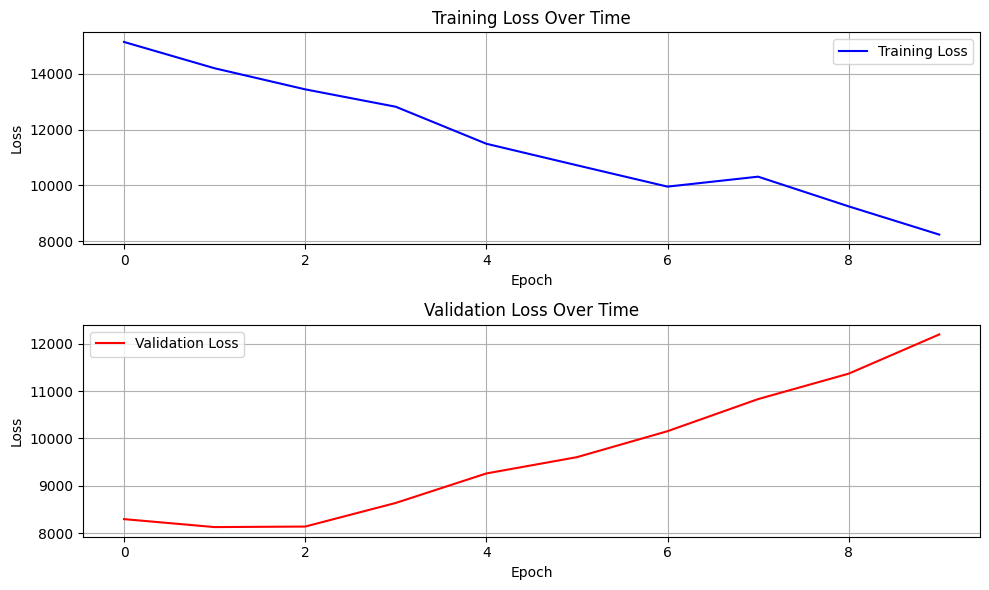

In [ ]:
import matplotlib.pyplot as plt

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Training loss subplot
ax1.plot(history.history["loss"], label="Training Loss", color="blue")
ax1.set_title("Training Loss Over Time")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.grid(True)

# Validation loss subplot
ax2.plot(history.history["val_loss"], label="Validation Loss", color="red")
ax2.set_title("Validation Loss Over Time")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend()
ax2.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
# plt.show() # Uncomment to show the plot

NameError: name 'history2' is not defined

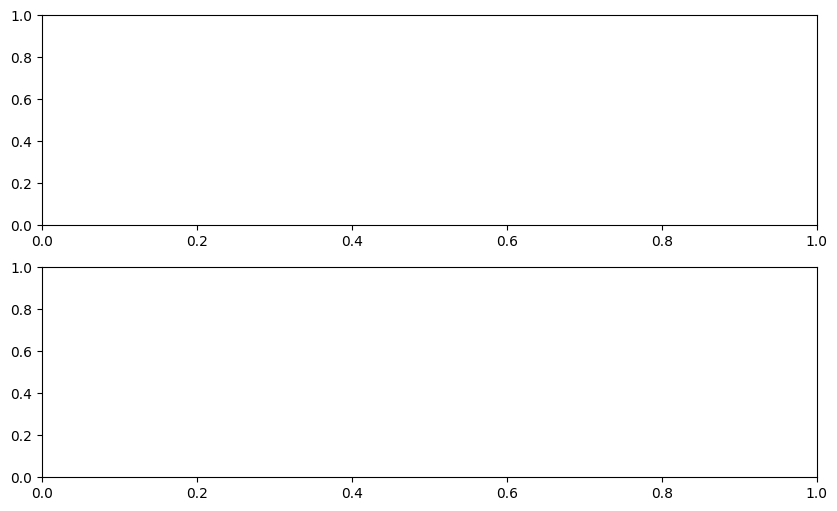

In [ ]:
import matplotlib.pyplot as plt

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Training loss subplot
ax1.plot(history2.history["loss"], label="Training Loss", color="blue")
ax1.set_title("Training Loss Over Time")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.grid(True)

# Validation loss subplot
ax2.plot(history2.history["val_loss"], label="Validation Loss", color="red")
ax2.set_title("Validation Loss Over Time")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend()
ax2.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
# plt.show() # Uncomment to show the plot

In [ ]:
query_model.save('/content/query_model',save_format='tf')
item_model.save('/content/item_model',save_format='tf')

In [ ]:
upload_dir_to_s3('/content/query_model', BUCKET_NAME, s3_prefix='model/query_model')

Uploaded /content/query_model/saved_model.pb to s3://recsys-system/model/query_model/saved_model.pb
Uploaded /content/query_model/fingerprint.pb to s3://recsys-system/model/query_model/fingerprint.pb
Uploaded /content/query_model/keras_metadata.pb to s3://recsys-system/model/query_model/keras_metadata.pb
Uploaded /content/query_model/variables/variables.index to s3://recsys-system/model/query_model/variables/variables.index
Uploaded /content/query_model/variables/variables.data-00000-of-00001 to s3://recsys-system/model/query_model/variables/variables.data-00000-of-00001


In [ ]:
upload_dir_to_s3('/content/item_model', BUCKET_NAME, s3_prefix='model/item_model')

Uploaded /content/item_model/saved_model.pb to s3://recsys-system/model/item_model/saved_model.pb
Uploaded /content/item_model/fingerprint.pb to s3://recsys-system/model/item_model/fingerprint.pb
Uploaded /content/item_model/keras_metadata.pb to s3://recsys-system/model/item_model/keras_metadata.pb
Uploaded /content/item_model/variables/variables.index to s3://recsys-system/model/item_model/variables/variables.index
Uploaded /content/item_model/variables/variables.data-00000-of-00001 to s3://recsys-system/model/item_model/variables/variables.data-00000-of-00001
